In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [6]:
df=pd.ExcelFile('Part2 - Company.xlsx',engine='openpyxl')
df.sheet_names
df = df.parse("Sheet1")
df.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [7]:
df.isnull().any()

A          False
B          False
C          False
D          False
Quality     True
dtype: bool

#### Target variables has null values. All other features do not have null values.

In [8]:
df.shape

(61, 5)

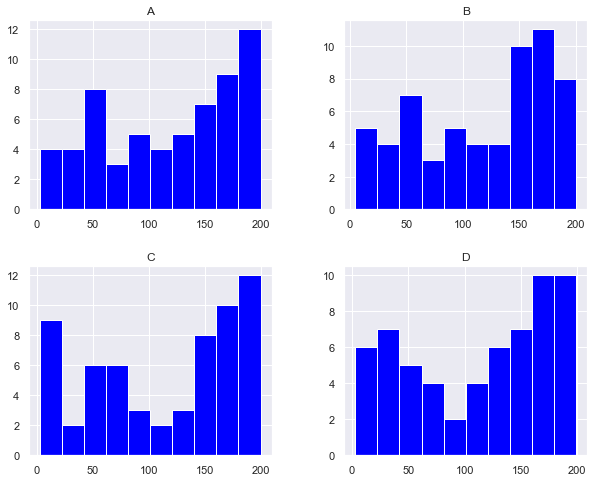

In [9]:
df.hist(bins = 10, figsize = (10, 8), color = 'blue')
plt.show()

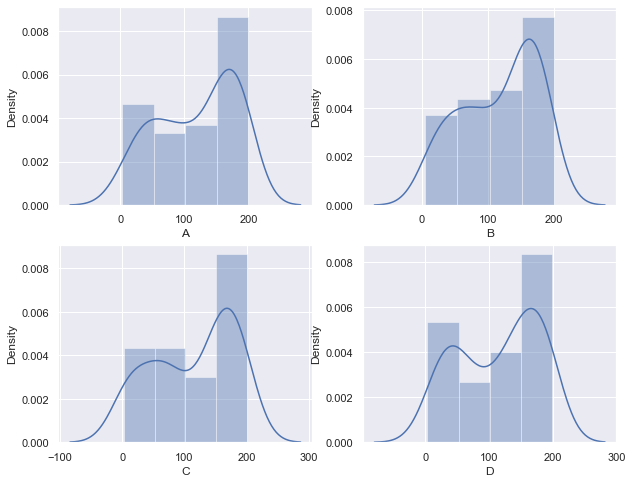

In [14]:
plt.figure(figsize=(10, 8))
col = 1
for i in df.iloc[:,0:4]:
    plt.subplot(2, 2, col)
    sns.distplot(df[i], color = 'b')
    col += 1

From both the visuals we can see that all chemical components are on similar numerical scale.

In [16]:
df_comp = df.iloc[:,0:4]
df_comp = df_comp.apply(zscore)
df_comp.head()

,A,B,C,D
0,-1.168034,-1.561080,-1.061569,-0.103138
1,0.904992,0.284923,0.306077,0.823013
2,0.660147,0.807376,0.321443,0.264129
3,-0.939512,-1.630740,-1.706975,-1.125099
4,-0.972158,-0.986381,-1.614775,-0.741864


In [17]:
df.Quality.value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

In [18]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_comp)
labels = k_means.labels_

In [19]:
silhouette_score(df_comp,labels)

0.6891674125195145

In [20]:
df["QualityLabels"] = labels

In [22]:
df.head(10)

,A,B,C,D,Quality,QualityLabels
0,47,27,45,108,Quality A,0
1,174,133,134,166,Quality B,1
2,159,163,135,131,NaN,1
3,61,23,3,44,Quality A,0
4,59,60,9,68,Quality A,0
5,153,140,154,199,NaN,1
6,34,28,78,22,Quality A,0
7,191,144,143,154,NaN,1
8,160,181,194,178,Quality B,1
9,145,178,158,141,NaN,1


In [23]:
df['QualityLabels'] = df['QualityLabels'].replace({0: 'Quality A', 1: 'Quality B'})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   A              61 non-null     int64 
 1   B              61 non-null     int64 
 2   C              61 non-null     int64 
 3   D              61 non-null     int64 
 4   Quality        43 non-null     object
 5   QualityLabels  61 non-null     object
dtypes: int64(4), object(2)
memory usage: 3.0+ KB


In [25]:
dfnew = df.dropna()

In [27]:
dfnew.head()

,A,B,C,D,Quality,QualityLabels
0,47,27,45,108,Quality A,Quality A
1,174,133,134,166,Quality B,Quality B
3,61,23,3,44,Quality A,Quality A
4,59,60,9,68,Quality A,Quality A
6,34,28,78,22,Quality A,Quality A


In [28]:
dfnew.shape

(43, 6)

In [29]:
predicted = dfnew['QualityLabels']
actual = dfnew['Quality']

Confusion matrix


<AxesSubplot:>

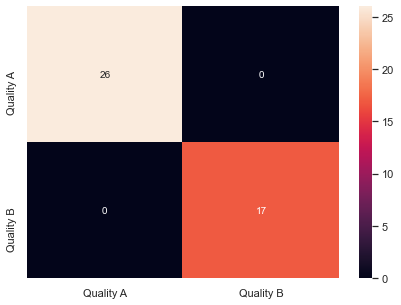

In [33]:
print('Confusion matrix')
cm=confusion_matrix(actual, predicted)

df_cm = pd.DataFrame(cm, index = [i for i in ["Quality A","Quality B"]],
                  columns = [i for i in ["Quality A","Quality B"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

#### We created a sythetic target variable called QualityLabels as predicted target variable. When we compare actual and predicted target variable, we found no misclassification.

#### We had 100% accuracy because dataset is very small. With much larger dataset we might have some miscalssification.

#### Because of 100% accuracy, now we can use sythetic variable as new target variable as there are no null values. 